In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt 
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(f"{device}로 학습합니다.")

cuda로 학습합니다.


In [3]:
random.seed(777)
torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 100
batch_size = 100

In [5]:
mnist_train = datasets.MNIST(root='MNIST_data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

mnist_test = datasets.MNIST(root='MNIST_data/',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

In [6]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device=device)

criterion = nn.CrossEntropyLoss().to(device=device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f'Epoch: {(epoch + 1): 04,d}, COST: {avg_cost:.9f}')

print('학습 종료')

Epoch:  001, COST: 0.534912467
Epoch:  002, COST: 0.359308600
Epoch:  003, COST: 0.331088215
Epoch:  004, COST: 0.316574216
Epoch:  005, COST: 0.307130307
Epoch:  006, COST: 0.300207883
Epoch:  007, COST: 0.294897258
Epoch:  008, COST: 0.290830433
Epoch:  009, COST: 0.287419587
Epoch:  010, COST: 0.284589082
Epoch:  011, COST: 0.281816214
Epoch:  012, COST: 0.279919684
Epoch:  013, COST: 0.277836859
Epoch:  014, COST: 0.276022315
Epoch:  015, COST: 0.274443209
Epoch:  016, COST: 0.273141623
Epoch:  017, COST: 0.271675020
Epoch:  018, COST: 0.270612031
Epoch:  019, COST: 0.269266129
Epoch:  020, COST: 0.268309355
Epoch:  021, COST: 0.267316043
Epoch:  022, COST: 0.266046673
Epoch:  023, COST: 0.265456587
Epoch:  024, COST: 0.264849991
Epoch:  025, COST: 0.264142454
Epoch:  026, COST: 0.263353467
Epoch:  027, COST: 0.262552917
Epoch:  028, COST: 0.261994511
Epoch:  029, COST: 0.261272311
Epoch:  030, COST: 0.260576248
Epoch:  031, COST: 0.260049820
Epoch:  032, COST: 0.259724677
Epoch:  

정확도: 86.85 %
Label: 8
Prediction: 3


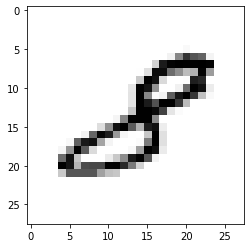

In [9]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"정확도: {accuracy.item()*100:.2f} %")

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r: r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r: r+1].to(device)

    print(f'Label: {Y_single_data.item()}')
    single_prediction = linear(X_single_data)
    print(f'Prediction: {torch.argmax(single_prediction, 1).item()}')

    plt.imshow(mnist_test.test_data[r: r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()